## 0) Setup & Conversione csv -> parquet

In [1]:
import os
from glob import glob
import pyarrow.csv as pacsv
import pyarrow.parquet as pq
import pyarrow.dataset as ds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict

print("Librerie importate")

# ----------------------------------------------
# TEMA GRAFICO UNIFICATO PER TUTTI I GRAFICI
# ----------------------------------------------

# Font e dimensioni testi
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.0,
    "grid.color": "#CCCCCC",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
})

# Stile generale dei grafici
sns.set_theme(
    style="whitegrid",   # sfondo chiaro professionale
    palette="tab10",     # palette uniforme per TUTTI i grafici
    font_scale=1.1
)

# Spessore linee nei lineplot
plt.rcParams["lines.linewidth"] = 2

print("Tema grafico unificato applicato")


# Directory dati
DATA_DIR = "data"
PARQUET_DIR = "parquet"
FIGS_DIR = "figs"
OUTPUT_DIR = "output"

# Creazione cartelle (senza controlli ripetuti)
os.makedirs(PARQUET_DIR, exist_ok=True)
os.makedirs(FIGS_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Funzione veloce per conversione CSV → Parquet
def convert_csv_to_parquet_fast(csv_dir, out_subdir):
    out_dir = os.path.join(PARQUET_DIR, out_subdir)
    os.makedirs(out_dir, exist_ok=True)

    csv_files = sorted(glob(os.path.join(csv_dir, "*.csv")))
    if not csv_files:
        raise ValueError(f"Nessun CSV in {csv_dir}")

    for f in csv_files:
        name = os.path.splitext(os.path.basename(f))[0]
        out_path = os.path.join(out_dir, f"{name}.parquet")

        if os.path.exists(out_path):
            print(f"[SKIP] {name}")
            continue

        print(f"[CSV → PARQUET] {name}")
        table = pacsv.read_csv(f)
        pq.write_table(table, out_path)

    print(f"✔ Conversione completata per {csv_dir}\n")


# Conversione dei tre dataset
convert_csv_to_parquet_fast(os.path.join(DATA_DIR, "invocations"), "invocations")
convert_csv_to_parquet_fast(os.path.join(DATA_DIR, "durations"),   "durations")
convert_csv_to_parquet_fast(os.path.join(DATA_DIR, "memory"),      "memory")

print("Tutti i CSV convertiti in Parquet")

Librerie importate
Tema grafico unificato applicato
[SKIP] invocations_per_function_md.anon.d01
[SKIP] invocations_per_function_md.anon.d02
[SKIP] invocations_per_function_md.anon.d03
[SKIP] invocations_per_function_md.anon.d04
[SKIP] invocations_per_function_md.anon.d05
[SKIP] invocations_per_function_md.anon.d06
[SKIP] invocations_per_function_md.anon.d07
[SKIP] invocations_per_function_md.anon.d08
[SKIP] invocations_per_function_md.anon.d09
[SKIP] invocations_per_function_md.anon.d10
[SKIP] invocations_per_function_md.anon.d11
[SKIP] invocations_per_function_md.anon.d12
[SKIP] invocations_per_function_md.anon.d13
[SKIP] invocations_per_function_md.anon.d14
✔ Conversione completata per data\invocations

[SKIP] function_durations_percentiles.anon.d01
[SKIP] function_durations_percentiles.anon.d02
[SKIP] function_durations_percentiles.anon.d03
[SKIP] function_durations_percentiles.anon.d04
[SKIP] function_durations_percentiles.anon.d05
[SKIP] function_durations_percentiles.anon.d06
[SK

## 1) Caricamento parquet

In [2]:
INV_PATH = os.path.join(PARQUET_DIR, "invocations")
DUR_PATH = os.path.join(PARQUET_DIR, "durations")
MEM_PATH = os.path.join(PARQUET_DIR, "memory")

ds_invocations = ds.dataset(INV_PATH, format="parquet")
ds_durations   = ds.dataset(DUR_PATH, format="parquet")
ds_memory      = ds.dataset(MEM_PATH, format="parquet")

print("Dataset Arrow pronti")

Dataset Arrow pronti


## 2) Esplorazione dei Dataset

In [3]:
from collections import Counter

def quick_info(dataset, name, sample_rows=5):
    print(f"\n=== {name.upper()} ===")

    # A) Numero righe
    n_rows = dataset.count_rows()
    print(f"Record: {n_rows:,}")

    # B) Schema (prime 10 colonne)
    schema_cols = [f"{f.name}:{f.type}" for f in dataset.schema][:10]
    print(f"Colonne (prime 10 su {len(dataset.schema)} totali):")
    for c in schema_cols:
        print(" -", c)

    # C) Campione leggero (solo X righe)
    sample_table = dataset.head(sample_rows)
    df_sample = sample_table.to_pandas()
    
    print("\nPrime righe campione:")
    display(df_sample)

print("Esplorazione veloce con Arrow + batch streaming")

quick_info(ds_invocations, "Invocations")
quick_info(ds_durations,   "Durations")
quick_info(ds_memory,      "Memory")

Esplorazione veloce con Arrow + batch streaming

=== INVOCATIONS ===
Record: 618,545
Colonne (prime 10 su 1444 totali):
 - HashOwner:string
 - HashApp:string
 - HashFunction:string
 - Trigger:string
 - 1:int64
 - 2:int64
 - 3:int64
 - 4:int64
 - 5:int64
 - 6:int64

Prime righe campione:


,HashOwner,HashApp,HashFunction,Trigger,1,2,3,4,5,6,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb9...,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,0d0ac65651f54ae3285a59564d64e39238b516fa1d5b56...,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed8...,orchestration,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,740c5c767e4b9978ee59a97d1829cfbaf755a47806a311...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,c108b4864b866b38b80d0e4594cc6d038f39668b804a1b...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



=== DURATIONS ===
Record: 662,927
Colonne (prime 10 su 14 totali):
 - HashOwner:string
 - HashApp:string
 - HashFunction:string
 - Average:int64
 - Count:int64
 - Minimum:double
 - Maximum:double
 - percentile_Average_0:int64
 - percentile_Average_1:int64
 - percentile_Average_25:int64

Prime righe campione:


,HashOwner,HashApp,HashFunction,Average,Count,Minimum,Maximum,percentile_Average_0,percentile_Average_1,percentile_Average_25,percentile_Average_50,percentile_Average_75,percentile_Average_99,percentile_Average_100
0,5640c1597ef75fa9a7e9c6925022a039a4ba9829241709...,5126901eff078c9a1f5295c859c9327588284a43cc2c0b...,c968871b4ef0123401975d026b85cae2ad7dad9d06ae94...,100,2880,0.0,2595.0,0,0,0,1,1,1376,2595
1,5640c1597ef75fa9a7e9c6925022a039a4ba9829241709...,5126901eff078c9a1f5295c859c9327588284a43cc2c0b...,1bc2d86badd21b18a8533d8e961e52585e5ad1fee0e2c2...,202,365,0.0,2596.0,0,0,1,1,6,2326,2596
2,41d6e09d0f86f5aaa1df842c1ac4f14fbd4dc676bec7e0...,77a93348150f5281c32c9027870a77983ad6eba72e6c28...,b4d7cb9985cd8c1b7fe5ef888bbde1883929e9a5b5d2a6...,11,37815,1.0,3913.0,1,1,3,5,8,155,3146
3,e117b8c1676e11d859824b18fc0202ae8eaa89cb3f58e2...,5c84cc1fbc4261f22d6f626304670979c1f1b94709acc8...,ff612aae7b380ef81ccef063ff814354ee16018af65dc1...,0,34466,0.0,123.0,0,0,0,0,0,1,10
4,3c8c13c6bd162490dae4402bcb9ff1e5c6c14bb21da35a...,3b80dfff065220947f7d626dd6c9176731d3e17591e496...,ee79840da82525548358f4b91d9fa1e550ec7af36bbe3e...,389,288,78.0,5607.0,78,78,109,136,180,4761,5607



=== MEMORY ===
Record: 206,809
Colonne (prime 10 su 12 totali):
 - HashOwner:string
 - HashApp:string
 - SampleCount:int64
 - AverageAllocatedMb:int64
 - AverageAllocatedMb_pct1:int64
 - AverageAllocatedMb_pct5:int64
 - AverageAllocatedMb_pct25:int64
 - AverageAllocatedMb_pct50:int64
 - AverageAllocatedMb_pct75:int64
 - AverageAllocatedMb_pct95:int64

Prime righe campione:


,HashOwner,HashApp,SampleCount,AverageAllocatedMb,AverageAllocatedMb_pct1,AverageAllocatedMb_pct5,AverageAllocatedMb_pct25,AverageAllocatedMb_pct50,AverageAllocatedMb_pct75,AverageAllocatedMb_pct95,AverageAllocatedMb_pct99,AverageAllocatedMb_pct100
0,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb9...,17235,108,108,108,108,109,109,109,110,110
1,dca6b75d51b494146b50f93b0f1a863ce99164942695e8...,cfccc67d83c3c4dc1dd075e77e41232282e4d7a75d2ba9...,536284,322,167,199,251,307,357,532,692,991
2,e564f454ffe6e39c133b43183ca5c1537fec3a55b3a73c...,93db1e4c30e99d1c416ee453dd67504641b88144e23219...,34726,673,175,301,471,679,875,1036,1179,1288
3,15d422b003e198041546b5a1b46aa4d3aaada57de592a8...,e59cebb1c16975c6ee9dd52430c55380dc305ae1fb9171...,17238,95,95,95,96,96,96,96,96,96
4,f5b5e5b8537dd76458e850d7c0dc4057dcd8e0dfa50d36...,fb68374027828434785f3c5ce09fcdc2e44212559643bd...,19927,204,182,185,202,206,211,214,223,292


## 3) Panorama generale


Cardinalità:
- Owner totali:    14,681
- App totali:      24,274
- Funzioni totali: 72,359

Copertura dataset:
- Funzioni con durations:  71,597
- Funzioni senza durations: 762
- App con memory:          23,431
- App senza memory:        843



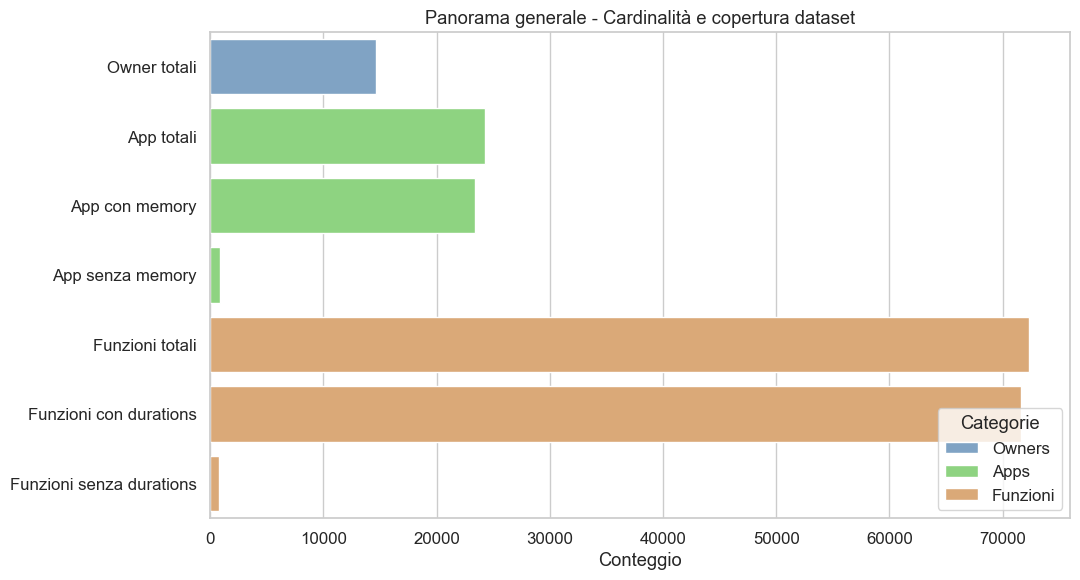

In [4]:
# -------------------------------------------------------------------
# Carichiamo SOLO le colonne chiave
# -------------------------------------------------------------------
inv_keys = ds_invocations.to_table(columns=["HashOwner", "HashApp", "HashFunction"])
dur_keys = ds_durations.to_table(columns=["HashOwner", "HashApp", "HashFunction"])
mem_keys = ds_memory.to_table(columns=["HashOwner", "HashApp"])

# Conversione in pandas
inv_df = inv_keys.to_pandas()
dur_df = dur_keys.to_pandas()
mem_df = mem_keys.to_pandas()

# -------------------------------------------------------------------
# Cardinalità principali
# -------------------------------------------------------------------
n_owners = inv_df['HashOwner'].nunique()
n_apps   = inv_df['HashApp'].nunique()
n_funcs  = inv_df['HashFunction'].nunique()

print("Cardinalità:")
print(f"- Owner totali:    {n_owners:,}")
print(f"- App totali:      {n_apps:,}")
print(f"- Funzioni totali: {n_funcs:,}\n")

# -------------------------------------------------------------------
# Copertura dataset
# -------------------------------------------------------------------
fun_with_dur = set(inv_df["HashFunction"]) & set(dur_df["HashFunction"])
n_fun_dur   = len(fun_with_dur)
n_fun_no_dur = n_funcs - n_fun_dur

app_with_mem = set(inv_df["HashApp"]) & set(mem_df["HashApp"])
n_app_mem   = len(app_with_mem)
n_app_no_mem = n_apps - n_app_mem

print("Copertura dataset:")
print(f"- Funzioni con durations:  {n_fun_dur:,}")
print(f"- Funzioni senza durations: {n_fun_no_dur:,}")
print(f"- App con memory:          {n_app_mem:,}")
print(f"- App senza memory:        {n_app_no_mem:,}\n")

# -------------------------------------------------------------------
# Creazione CSV riepilogativo
# -------------------------------------------------------------------
summary_df = pd.DataFrame({
    "Metric": [
        "Owner totali", "App totali", "App con memory", "App senza memory",
        "Funzioni totali", "Funzioni con durations", "Funzioni senza durations"
    ],
    "Value": [
        n_owners, n_apps, n_app_mem, n_app_no_mem,
        n_funcs, n_fun_dur, n_fun_no_dur
    ]
})

summary_df.to_csv(os.path.join(OUTPUT_DIR, "panorama_generale_summary.csv"),
                  index=False, sep=';', encoding='utf-8')

# -------------------------------------------------------------------
# Grafico a barre ordinato con colori pastello
# -------------------------------------------------------------------

# Ordine logico delle metriche
ordered_metrics = [
    "Owner totali",
    "App totali", "App con memory", "App senza memory",
    "Funzioni totali", "Funzioni con durations", "Funzioni senza durations"
]

summary_df["Metric"] = pd.Categorical(summary_df["Metric"],
                                      categories=ordered_metrics,
                                      ordered=True)
summary_df = summary_df.sort_values("Metric")

# Categoria logica per ogni metrica
category_map = {
    "Owner totali": "Owners",
    "App totali": "Apps",
    "App con memory": "Apps",
    "App senza memory": "Apps",
    "Funzioni totali": "Funzioni",
    "Funzioni con durations": "Funzioni",
    "Funzioni senza durations": "Funzioni"
}

summary_df["Categoria"] = summary_df["Metric"].map(category_map)

# Palette
category_palette = {
    "Owners":   "#75a4cf",  # azzurrino chiaro
    "Apps":     "#85e173",  # verdino chiaro
    "Funzioni": "#eaa968",  # arancio chiaro
}

plt.figure(figsize=(11, 6))
ax = sns.barplot(
    x="Value",
    y="Metric",
    data=summary_df,
    hue="Categoria",      
    dodge=False,
    palette=category_palette
)

plt.title("Panorama generale - Cardinalità e copertura dataset")
plt.xlabel("Conteggio")
plt.ylabel("")
plt.legend(title="Categorie", loc="lower right")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "panorama_generale_summary.png"))
plt.show()


## 4) Analisi delle Invocazioni

Analisi invocazioni in streaming per RAM limitata...


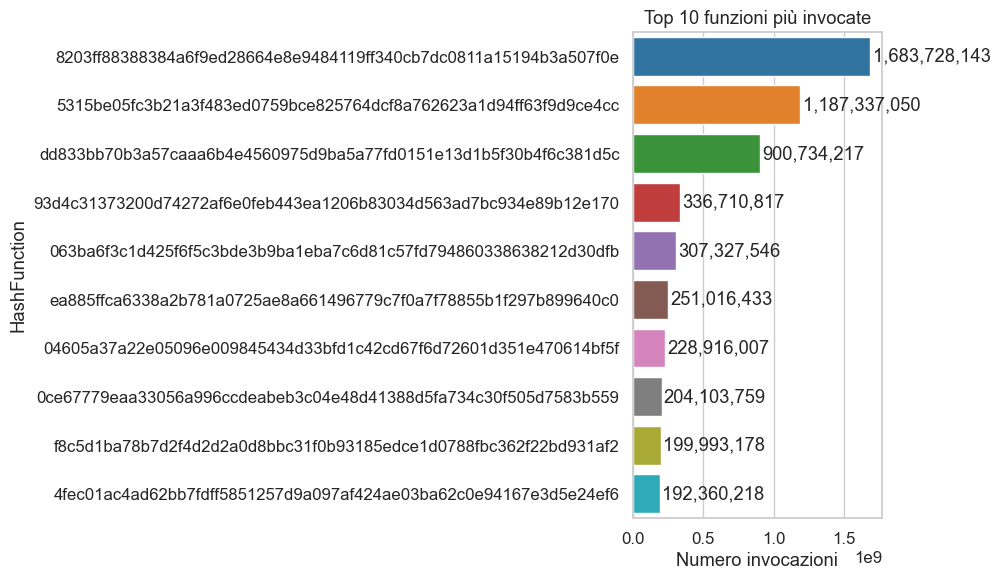


Top 3 funzioni più invocate:
1. 8203ff88388384a6f9ed28664e8e9484119ff340cb7dc0811a15194b3a507f0e - 1,683,728,143 invocazioni
2. 5315be05fc3b21a3f483ed0759bce825764dcf8a762623a1d94ff63f9d9ce4cc - 1,187,337,050 invocazioni
3. dd833bb70b3a57caaa6b4e4560975d9ba5a77fd0151e13d1b5f30b4f6c381d5c - 900,734,217 invocazioni


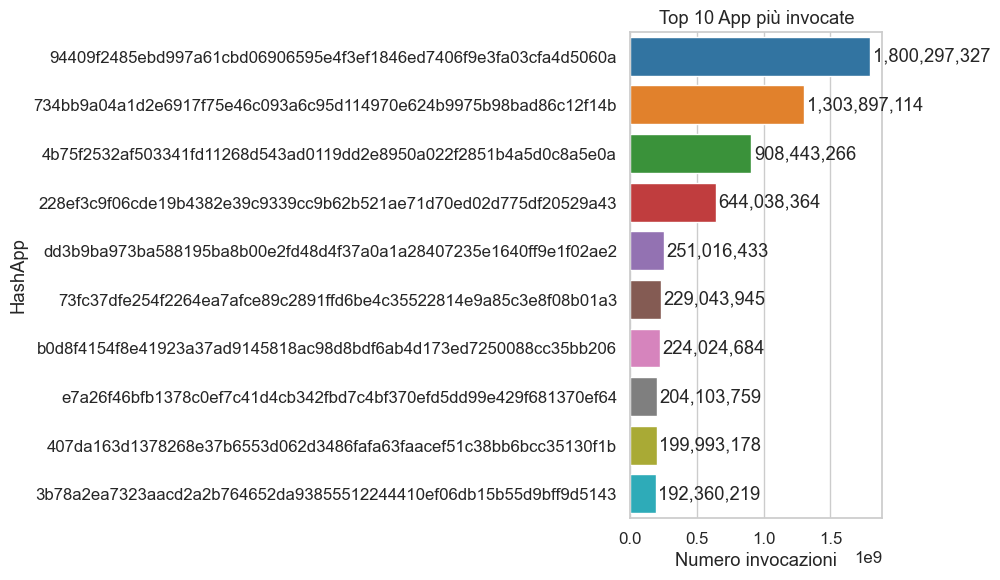


Top 3 app più invocate:
1. 94409f2485ebd997a61cbd06906595e4f3ef1846ed7406f9e3fa03cfa4d5060a - 1,800,297,327 invocazioni
2. 734bb9a04a1d2e6917f75e46c093a6c95d114970e624b9975b98bad86c12f14b - 1,303,897,114 invocazioni
3. 4b75f2532af503341fd11268d543ad0119dd2e8950a022f2851b4a5d0c8a5e0a - 908,443,266 invocazioni

Analisi approfondita dei trigger


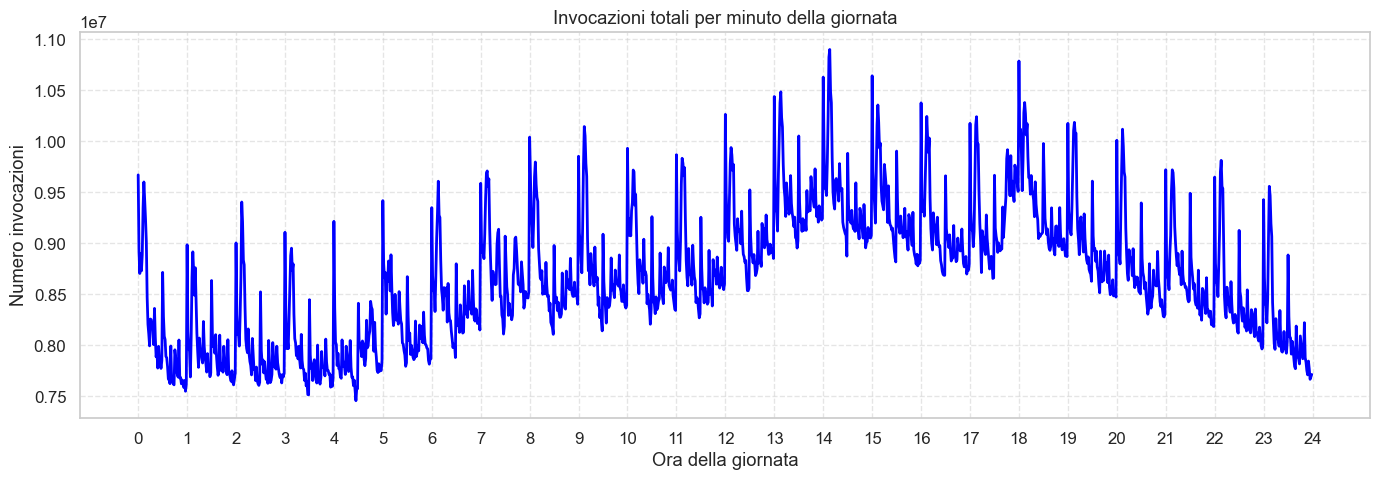

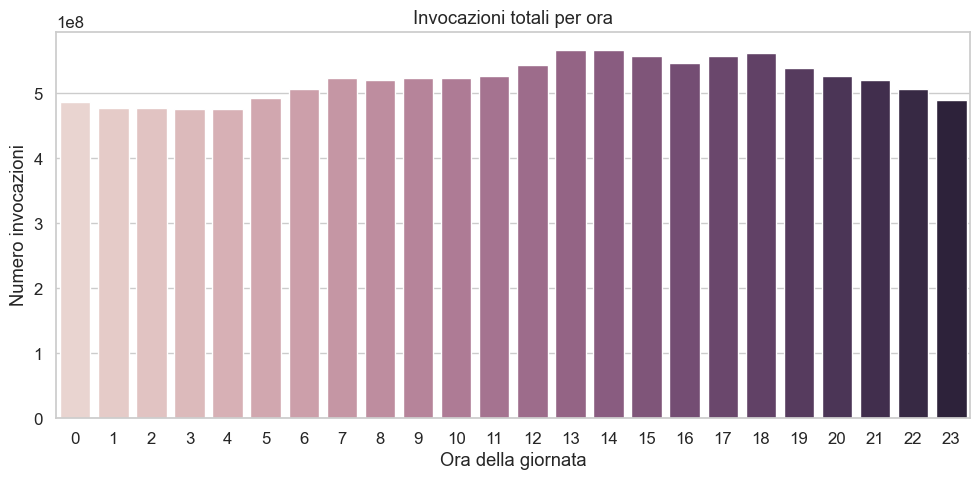

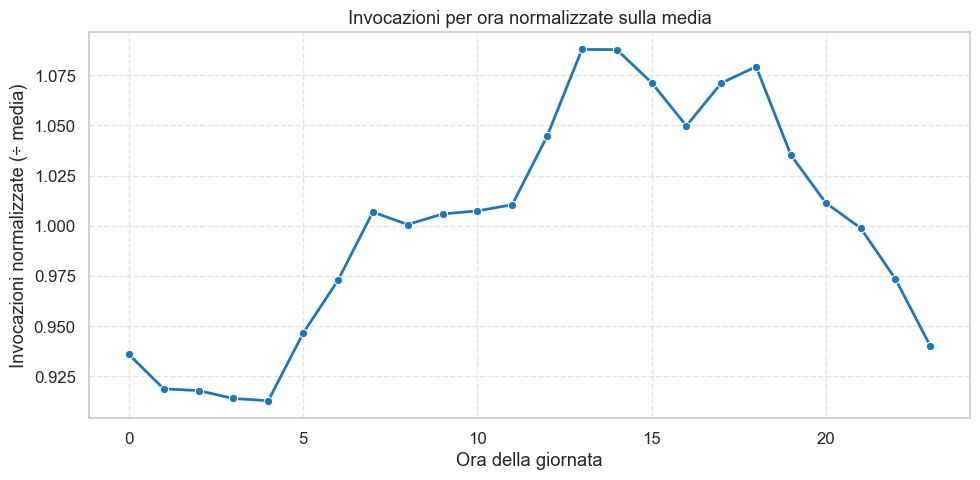


Minuto di picco: 848 (14:8)
Minuto minimo: 267 (4:27)
Analisi delle invocazioni completata. Figure e CSV salvati in 'figs/' e 'output/'


In [5]:
print("Analisi invocazioni in streaming per RAM limitata...")

# Colonne chiave + 1440 temporali
time_cols = [str(i) for i in range(1, 1441)]
key_cols = ["HashOwner", "HashApp", "HashFunction"]
all_cols = key_cols + time_cols

# Contatori
func_counter = Counter()
app_counter  = Counter()
time_series_total = np.zeros(1440, dtype=np.int64)

# Elaborazione batch streaming
for batch in ds_invocations.to_batches(columns=all_cols):
    batch_df = batch.to_pandas()
    
    # Totale invocazioni per funzione
    func_counter.update(batch_df.groupby("HashFunction")[time_cols].sum().sum(axis=1).to_dict())
    
    # Totale invocazioni per app
    app_counter.update(batch_df.groupby("HashApp")[time_cols].sum().sum(axis=1).to_dict())
    
    # Serie temporale totale
    time_series_total += batch_df[time_cols].sum(axis=0).to_numpy()

# -------------------------------------------------------------------
# Top 10 funzioni più invocate
# -------------------------------------------------------------------
func_counts = pd.Series(func_counter).sort_values(ascending=False)
top10_funcs = pd.DataFrame({"Function": func_counts.index[:10], "Count": func_counts.values[:10]})
top10_funcs.to_csv(os.path.join(OUTPUT_DIR, "top10_functions.csv"), index=False, sep=';', encoding='utf-8')

plt.figure(figsize=(10,6))
ax = sns.barplot(x="Count", y="Function", data=top10_funcs, hue="Function", dodge=False, legend=False)
plt.title("Top 10 funzioni più invocate")
plt.xlabel("Numero invocazioni")
plt.ylabel("HashFunction")
plt.legend([], [], frameon=False)

# Valori sopra le barre
for i, row in top10_funcs.iterrows():
    ax.text(row['Count'] + top10_funcs['Count'].max()*0.01, i, f"{row['Count']:,}", va='center')

plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "top10_functions.png"))
plt.show()

# Top 3 funzioni più invocate
print("\nTop 3 funzioni più invocate:")
for i, row in top10_funcs.head(3).iterrows():
    print(f"{i+1}. {row['Function']} - {row['Count']:,} invocazioni")

# -------------------------------------------------------------------
# Top 10 app più invocate
# -------------------------------------------------------------------
app_counts = pd.Series(app_counter).sort_values(ascending=False)
top10_apps = pd.DataFrame({"App": app_counts.index[:10], "Count": app_counts.values[:10]})
top10_apps.to_csv(os.path.join(OUTPUT_DIR, "top10_apps.csv"), index=False, sep=';', encoding='utf-8')

plt.figure(figsize=(10,6))
ax = sns.barplot(x="Count", y="App", data=top10_apps, hue="App", dodge=False, legend=False)
plt.title("Top 10 App più invocate")
plt.xlabel("Numero invocazioni")
plt.ylabel("HashApp")
plt.legend([], [], frameon=False)

# Valori sopra le barre
for i, row in top10_apps.iterrows():
    ax.text(row['Count'] + top10_apps['Count'].max()*0.01, i, f"{row['Count']:,}", va='center')

plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "top10_apps.png"))
plt.show()

# Top 3 app più invocate
print("\nTop 3 app più invocate:")
for i, row in top10_apps.head(3).iterrows():
    print(f"{i+1}. {row['App']} - {row['Count']:,} invocazioni")

print("\nAnalisi approfondita dei trigger")

# -------------------------------------------------------------------
# Serie temporale globale (24h)
# -------------------------------------------------------------------
minutes = np.arange(1440)
hours = minutes / 60

plt.figure(figsize=(14,5))
plt.plot(hours, time_series_total, label="Invocazioni per minuto", color="blue")
plt.title("Invocazioni totali per minuto della giornata")
plt.xlabel("Ora della giornata")
plt.ylabel("Numero invocazioni")
plt.xticks(np.arange(0,25,1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "total_time_series.png"))
plt.show()


# -------------------------------------------------------------------
# Invocazioni aggregate per ora
# -------------------------------------------------------------------
hourly_series = time_series_total.reshape(24, 60).sum(axis=1)
hourly_df = pd.DataFrame({"Hour": np.arange(24), "Count": hourly_series})
hourly_df.to_csv(os.path.join(OUTPUT_DIR, "hourly_total.csv"), index=False, sep=';', encoding='utf-8')

plt.figure(figsize=(10,5))
sns.barplot(x="Hour", y="Count", data=hourly_df, hue="Hour", dodge=False, legend=False)
plt.title("Invocazioni totali per ora")
plt.xlabel("Ora della giornata")
plt.ylabel("Numero invocazioni")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "hourly_total.png"))
plt.show()

# -------------------------------------------------------------------
# Serie oraria normalizzata sulla media
# -------------------------------------------------------------------
hourly_norm = hourly_series / hourly_series.mean()

norm_df = pd.DataFrame({
    "Hour": np.arange(24),
    "Normalized": hourly_norm
})

plt.figure(figsize=(10,5))
sns.lineplot(x="Hour", y="Normalized", data=norm_df, marker="o")
plt.title("Invocazioni per ora normalizzate sulla media")
plt.xlabel("Ora della giornata")
plt.ylabel("Invocazioni normalizzate (÷ media)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "hourly_normalized.png"))
plt.show()

# Picco/minimo
peak_minute = np.argmax(time_series_total)
min_minute = np.argmin(time_series_total)
print(f"\nMinuto di picco: {peak_minute} ({peak_minute//60}:{peak_minute%60})")
print(f"Minuto minimo: {min_minute} ({min_minute//60}:{min_minute%60})")

print("Analisi delle invocazioni completata. Figure e CSV salvati in 'figs/' e 'output/'")

## 4b) Analisi dei trigger

Analisi approfondita dei trigger...


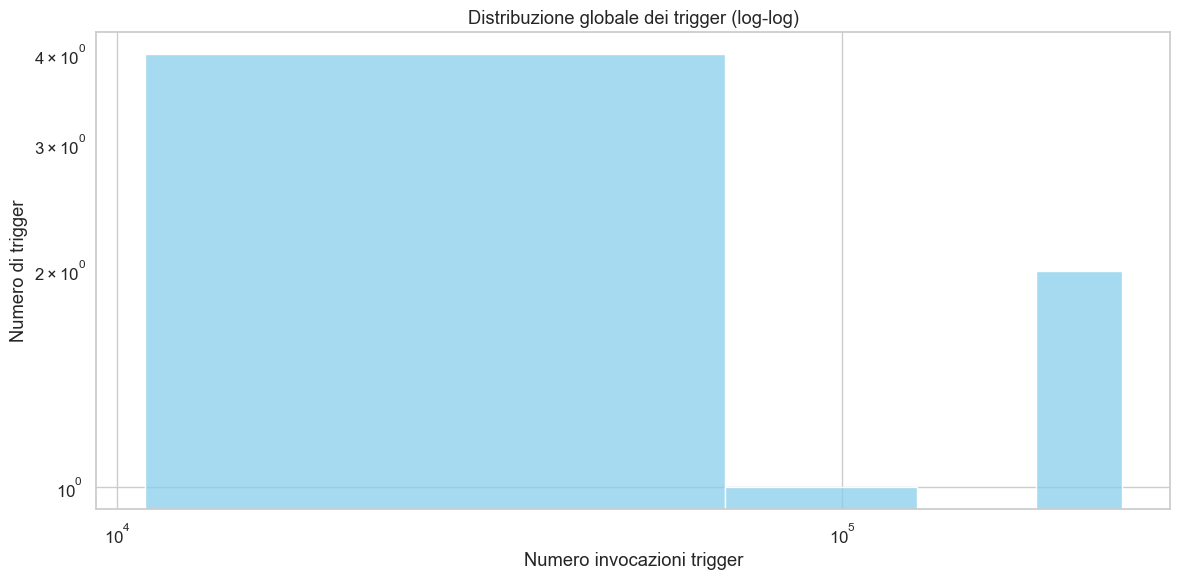

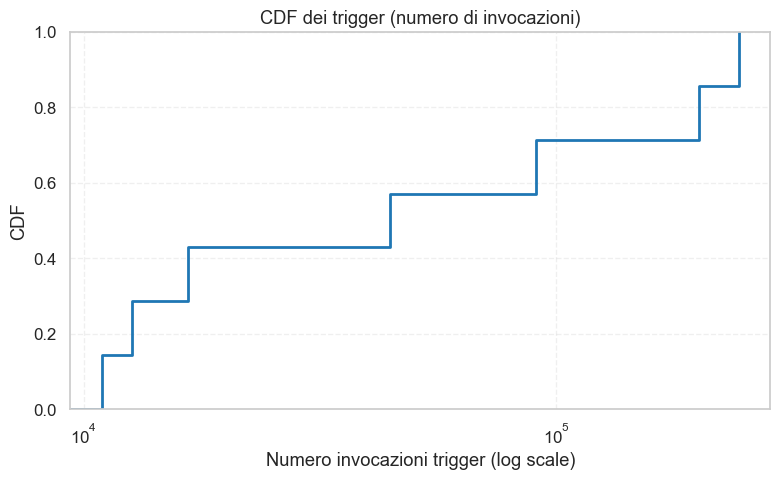

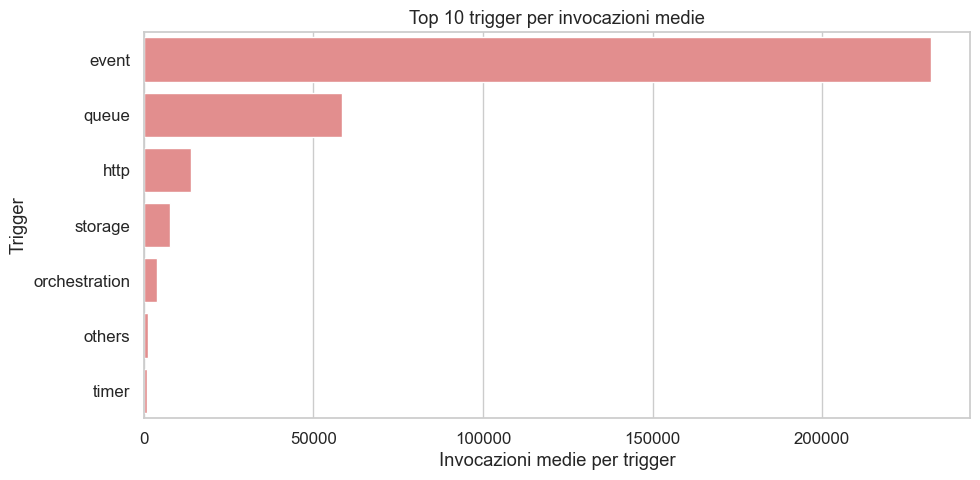


Top 10 trigger per invocazioni medie:
event            232123.308870
queue             58519.123058
http              14041.875911
storage            7715.288161
orchestration      3943.283101
others             1393.957792
timer               937.802945
dtype: float64
\Distribuzione trigger per numero di funzioni
Trigger
http             30440
timer            20074
queue            10601
orchestration     5761
others            3998
event             1859
storage           1614
Name: HashFunction, dtype: int64


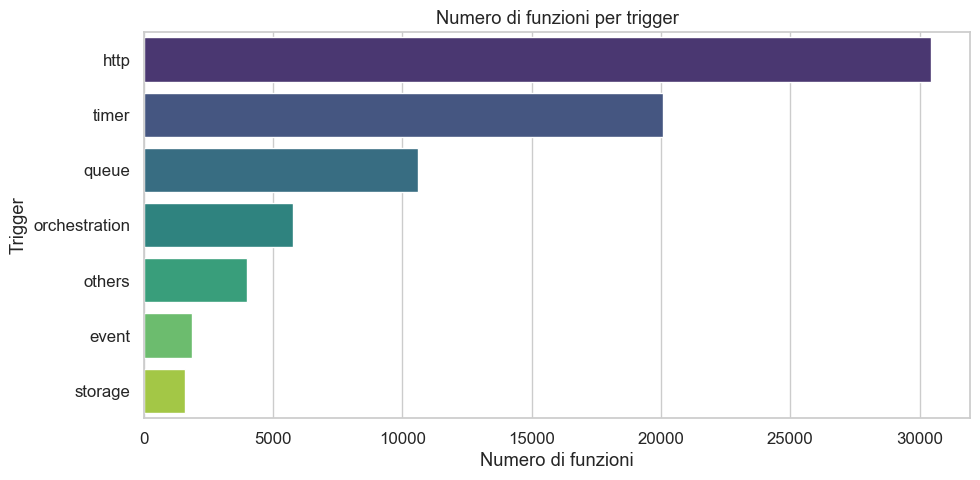

Analisi dei trigger completata. Figure e CSV salvati in 'figs/' e 'output/'


In [6]:
print("Analisi approfondita dei trigger...")

from collections import Counter, defaultdict

# -------------------------------
# Inizializzazione contatori
# -------------------------------
trigger_counter = Counter()           # Conteggio totale trigger
trigger_durations = defaultdict(list) # Accumulo invocazioni per trigger

minute_cols = [str(i) for i in range(1, 1441)]  # Colonne temporali

# -------------------------------
# Streaming batch
# -------------------------------
for batch in ds_invocations.to_batches(columns=["Trigger"] + minute_cols):
    df = batch.to_pandas()
    
    # Totale invocazioni per riga
    df["TotalInvocations"] = df[minute_cols].sum(axis=1)
    
    # Conteggio totale trigger
    trigger_counter.update(df["Trigger"].to_list())
    
    # Accumulo invocazioni per media
    for trig, group in df.groupby("Trigger"):
        trigger_durations[trig].extend(group["TotalInvocations"].tolist())

# -------------------------------
# Serie globale dei trigger
# -------------------------------
all_triggers_counts = pd.Series(trigger_counter).sort_values(ascending=False)

# Salvataggio CSV globale
all_triggers_df = pd.DataFrame({
    "Trigger": all_triggers_counts.index,
    "Count": all_triggers_counts.values
})
all_triggers_df.to_csv(os.path.join(OUTPUT_DIR, "all_triggers.csv"), index=False, sep=';', encoding='utf-8')

# -------------------------------
# Distribuzione dei trigger
# -------------------------------
plt.figure(figsize=(12,6))
sns.histplot(all_triggers_counts.values, bins='auto', color="skyblue")
plt.yscale("log")
plt.xscale("log")
plt.title("Distribuzione globale dei trigger (log-log)")
plt.xlabel("Numero invocazioni trigger")
plt.ylabel("Numero di trigger")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "triggers_distribution_loglog.png"))
plt.show()

# -------------------------------
# CDF dei trigger
# -------------------------------
plt.figure(figsize=(8,5))
sns.ecdfplot(all_triggers_counts.values)
plt.xscale("log")
plt.title("CDF dei trigger (numero di invocazioni)")
plt.xlabel("Numero invocazioni trigger (log scale)")
plt.ylabel("CDF")
plt.grid(True, ls="--", alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "triggers_cdf.png"))
plt.show()

# -------------------------------
# Top 10 trigger per invocazioni medie
# -------------------------------
trigger_avg = {k: np.mean(v) for k,v in trigger_durations.items() if len(v) > 0}
top10_trigger_avg = pd.Series(trigger_avg).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10_trigger_avg.values, y=top10_trigger_avg.index, dodge=False, color="lightcoral")
plt.title("Top 10 trigger per invocazioni medie")
plt.xlabel("Invocazioni medie per trigger")
plt.ylabel("Trigger")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "top10_trigger_avg.png"))
plt.show()

# Stampa valori Top 10
print("\nTop 10 trigger per invocazioni medie:")
print(top10_trigger_avg)

# -------------------------------
# Distribuzione trigger per funzioni
# -------------------------------

print("\Distribuzione trigger per numero di funzioni")

# Ricavo tabella HashFunction - Trigger senza duplicati
trigger_func_df = ds_invocations.to_table(columns=["HashFunction", "Trigger"]) \
                                .to_pandas() \
                                .drop_duplicates()

trigger_func_count = trigger_func_df.groupby("Trigger")["HashFunction"].count() \
                                    .sort_values(ascending=False)

print(trigger_func_count)

# Salvataggio CSV
trigger_func_count.to_csv(
    os.path.join(OUTPUT_DIR, "trigger_per_function.csv"),
    sep=';', encoding='utf-8'
)

# Grafico semplice
plt.figure(figsize=(10,5))
sns.barplot(
    x="Count",
    y="Trigger",
    data=trigger_func_count.reset_index().rename(columns={"HashFunction": "Count"}),
    hue="Trigger",
    dodge=False,
    legend=False,
    palette="viridis"
)

plt.title("Numero di funzioni per trigger")
plt.xlabel("Numero di funzioni")
plt.ylabel("Trigger")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "trigger_per_function.png"))
plt.show()

print("Analisi dei trigger completata. Figure e CSV salvati in 'figs/' e 'output/'")

## 5) Analisi delle Durate

Analisi delle durate in streaming per RAM limitata... 
Statistiche globali delle durate (ms):
- Median: 672.00
- P90: 16803.00
- P95: 42644.90
- P99: 224665.13
- Mean: 10039.36
- Min: 0.00
- Max: 1800409.00
\Generazione CDF per Average, Minimum e Maximum


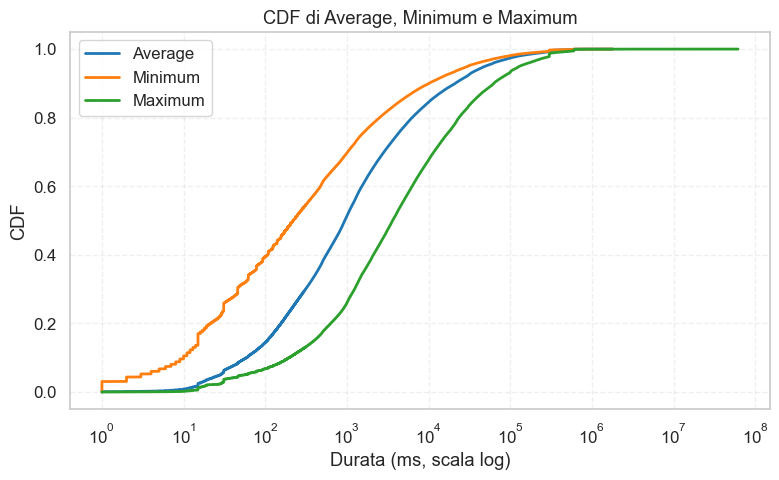

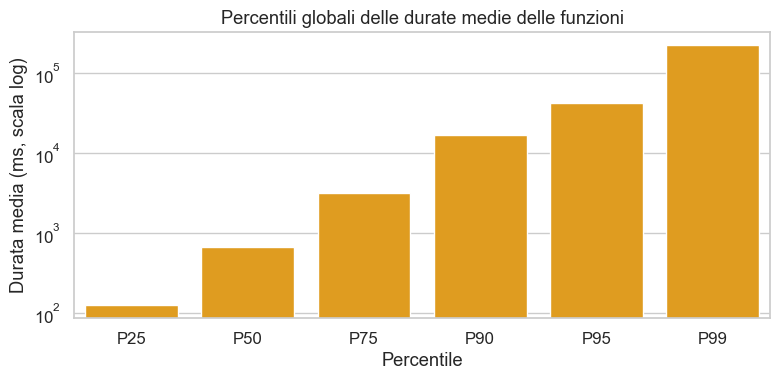

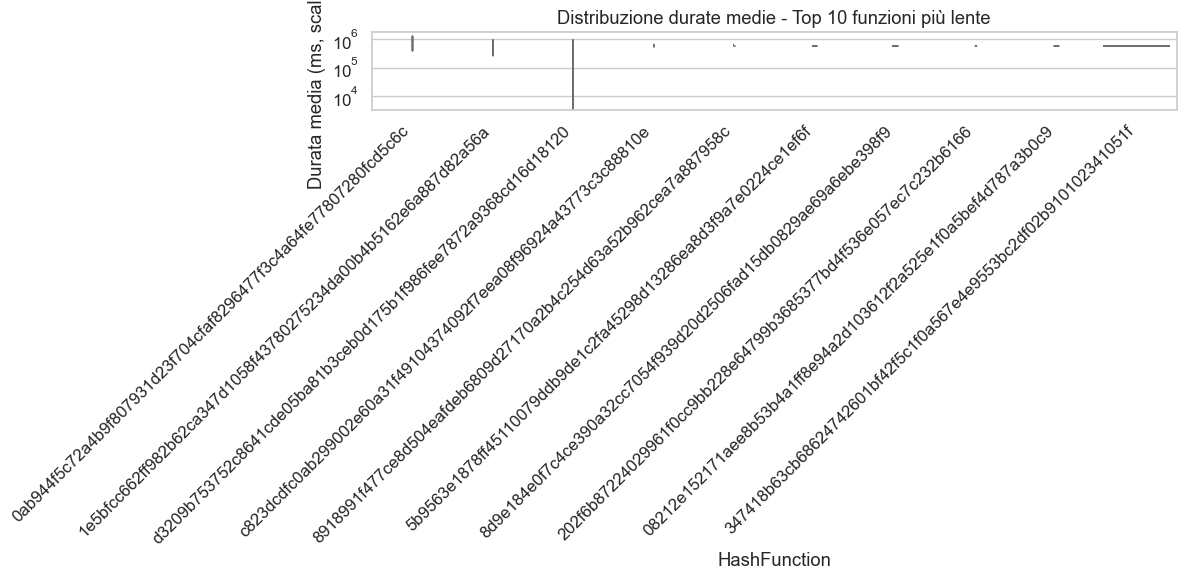


Top 3 funzioni più lente (mediana):
1. 0ab944f5c72a4b9f807931d23f704cfaf8296477f3c4a64fe77807280fcd5c6c - 886277.00 ms
2. 1e5bfcc662ff982b62ca347d1058f43780275234da00b4b5162e6a887d82a56a - 650456.00 ms
3. d3209b753752c8641cde05ba81b3ceb0d175b1f986fee7872a9368cd16d18120 - 644505.00 ms


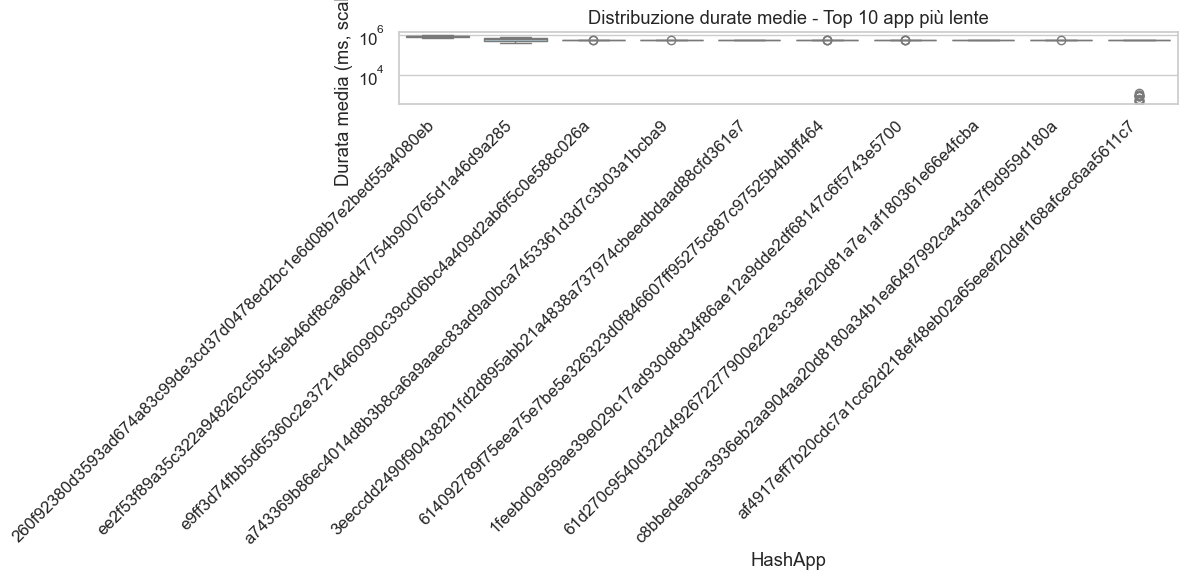

Top 3 app più lente (mediana):
1. 260f92380d3593ad674a83c99de3cd37d0478ed2bc1e6d08b7e2bed55a4080eb - 886277.00 ms
2. ee2f53f89a35c322a948262c5b545eb46df8ca96d47754b900765d1a46d9a285 - 650456.00 ms
3. e9ff3d74fbb5d65360c2e37216460990c39cd06bc4a409d2ab6f5c0e588c026a - 602960.00 ms
Analisi delle durate completata. Figure e CSV salvati in 'figs/' e 'output/'


In [7]:
print("Analisi delle durate in streaming per RAM limitata... ")

# -------------------------------------------------------------------
# Contatori e raccolta durate per funzione/app
# -------------------------------------------------------------------
func_durations = defaultdict(list)
app_durations  = defaultdict(list)
global_durations = []

for batch in ds_durations.to_batches(columns=key_cols + ["Average"]):
    df = batch.to_pandas()
    df = df[df["Average"] >= 0]

    global_durations.extend(df["Average"].tolist())

    for func, group in df.groupby("HashFunction"):
        func_durations[func].extend(group["Average"].tolist())

    for app, group in df.groupby("HashApp"):
        app_durations[app].extend(group["Average"].tolist())

# -------------------------------------------------------------------
# Statistiche globali
# -------------------------------------------------------------------
global_series = pd.Series(global_durations)
stats = {
    "Median": global_series.median(),
    "P90": global_series.quantile(0.9),
    "P95": global_series.quantile(0.95),
    "P99": global_series.quantile(0.99),
    "Mean": global_series.mean(),
    "Min": global_series.min(),
    "Max": global_series.max()
}
print("Statistiche globali delle durate (ms):")
for k,v in stats.items():
    print(f"- {k}: {v:.2f}")
    
# -------------------------------------------------------------------
# CDF di Average, Minimum e Maximum (Modifica 3)
# -------------------------------------------------------------------

print("\Generazione CDF per Average, Minimum e Maximum")

avg_list = []
min_list = []
max_list = []

# Lettura in streaming anche dei campi Minimum e Maximum
for batch in ds_durations.to_batches(columns=["Average", "Minimum", "Maximum"]):
    df = batch.to_pandas()
    df = df[(df["Average"] > 0) & (df["Minimum"] > 0) & (df["Maximum"] > 0)]
    
    avg_list.extend(df["Average"].tolist())
    min_list.extend(df["Minimum"].tolist())
    max_list.extend(df["Maximum"].tolist())

plt.figure(figsize=(8,5))

for vals, label in [
    (avg_list, "Average"),
    (min_list, "Minimum"),
    (max_list, "Maximum")
]:
    s = np.sort(vals)
    y = np.linspace(0, 1, len(s))
    plt.plot(s, y, label=label)

plt.xscale("log")
plt.xlabel("Durata (ms, scala log)")
plt.ylabel("CDF")
plt.title("CDF di Average, Minimum e Maximum")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "durations_avg_min_max_cdf.png"))
plt.show()

# -------------------------------------------------------------------
# Percentili globali per grafico leggibile
# -------------------------------------------------------------------
percentiles = [25, 50, 75, 90, 95, 99]
percentile_values = global_series.quantile([p/100 for p in percentiles])

plt.figure(figsize=(8,4))
sns.barplot(x=[f"P{p}" for p in percentiles], y=percentile_values.values, color="orange")
plt.yscale("log")
plt.title("Percentili globali delle durate medie delle funzioni")
plt.ylabel("Durata media (ms, scala log)")
plt.xlabel("Percentile")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "duration_global_percentiles_log.png"))
plt.show()

# -------------------------------------------------------------------
# Top 10 funzioni/app più lente (mediana)
# -------------------------------------------------------------------
func_median = {f: pd.Series(d).median() for f,d in func_durations.items()}
top_slowest_funcs = pd.Series(func_median).sort_values(ascending=False).head(10)

app_median = {a: pd.Series(d).median() for a,d in app_durations.items()}
top_slowest_apps = pd.Series(app_median).sort_values(ascending=False).head(10)

# Salvataggio CSV
pd.DataFrame({"Function": top_slowest_funcs.index, "MedianDuration": top_slowest_funcs.values})\
  .to_csv(os.path.join(OUTPUT_DIR, "top10_slowest_functions.csv"), index=False, sep=';', encoding='utf-8')
pd.DataFrame({"App": top_slowest_apps.index, "MedianDuration": top_slowest_apps.values})\
  .to_csv(os.path.join(OUTPUT_DIR, "top10_slowest_apps.csv"), index=False, sep=';', encoding='utf-8')

# -------------------------------------------------------------------
# Boxplot/Violin plot top 10 funzioni più lente
# -------------------------------------------------------------------
top_funcs_df = pd.DataFrame({
    "Function": np.repeat(top_slowest_funcs.index, [len(func_durations[f]) for f in top_slowest_funcs.index]),
    "Duration": np.concatenate([func_durations[f] for f in top_slowest_funcs.index])
})

plt.figure(figsize=(12,6))
sns.violinplot(x="Function", y="Duration", data=top_funcs_df, inner="quartile", dodge=False, color="lightcoral")
plt.yscale("log")
plt.title("Distribuzione durate medie - Top 10 funzioni più lente")
plt.ylabel("Durata media (ms, scala log)")
plt.xlabel("HashFunction")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "top10_slowest_functions_violin_log.png"))
plt.show()

print("\nTop 3 funzioni più lente (mediana):")
for i, (f, v) in enumerate(top_slowest_funcs.head(3).items(), 1):
    print(f"{i}. {f} - {v:.2f} ms")

# -------------------------------------------------------------------
# Boxplot top 10 app più lente
# -------------------------------------------------------------------
top_apps_df = pd.DataFrame({
    "App": np.repeat(top_slowest_apps.index, [len(app_durations[a]) for a in top_slowest_apps.index]),
    "Duration": np.concatenate([app_durations[a] for a in top_slowest_apps.index])
})

plt.figure(figsize=(12,6))
sns.boxplot(x="App", y="Duration", data=top_apps_df, color="lightblue", dodge=False)
plt.yscale("log")
plt.title("Distribuzione durate medie - Top 10 app più lente")
plt.ylabel("Durata media (ms, scala log)")
plt.xlabel("HashApp")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "top10_slowest_apps_boxplot_log.png"))
plt.show()

print("Top 3 app più lente (mediana):")
for i, (a, v) in enumerate(top_slowest_apps.head(3).items(), 1):
    print(f"{i}. {a} - {v:.2f} ms")

print("Analisi delle durate completata. Figure e CSV salvati in 'figs/' e 'output/'")

## 6) Analisi delle Memorie

Analisi memoria allocata in streaming per RAM limitata...
Statistiche globali della memoria allocata (MB):
- Median: 143.00
- P90: 210.00
- P95: 242.00
- P99: 408.00
- Mean: 161.19
- Min: 30.00
- Max: 1460.00


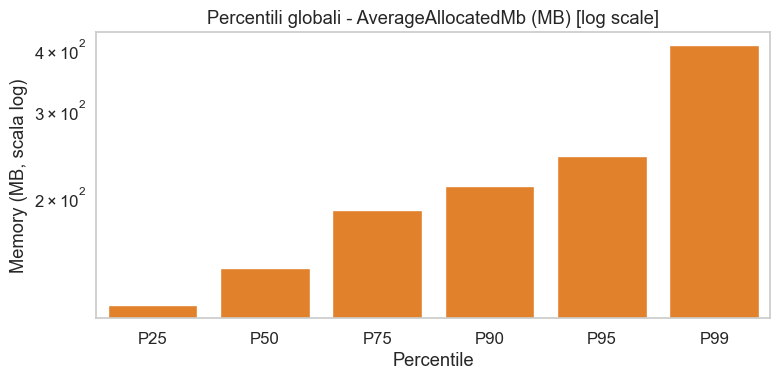


Top 10 app per mediana memoria (MB):
bd35c5fc19219ff09b493a045695512d3dced53e365a4047daf6379eaab0abad    1366.0
07a217a2813f9196d75ba1f5b1dea208f89b4113123eaa338326a3f8876fae99    1130.5
1055ce9522214dfedb4d8571b02849b3496521b9b5840fc9d1fa7d4bf472e601    1097.0
911242ef93348b8eb9c33475afac73cc18f87ce4707510a6312bcf91c161f5b9    1048.0
60393a5c156c1905114e7104d51cff90fbf6ca7068c96492a18ff1dd13e5becc     991.5
38d83139ee29a31131a033865f3ef7f1e9f35034e6271328f74204943f9eccfb     986.5
93147c26bad175e99e0911bf3bf3c4100528aba2df92ebdde7f9a7c24ad938f5     974.0
6267277a3b45fd33fd0ec553640d4c7e346468739a2c63171e844d8103fe8122     950.5
ef772dfef479f860c994db2efbf393b2ddd2cbbc4ccaf60cd614c67859b5c4dc     939.0
5d717bfcb7a9c4ce806f6fdd4c3fc80e6fef23b9e37765a107a3bb2e01f89983     933.0

Top 10 app per Pct99 memoria (MB):
b02b88a988c6f7a921f0bbb932ebe4a5c653e1887d54ce8d68a73fd32c02b2cb    1524.0
dea97cb53d119383e1d392219c3f1820e6a8e43b5879857bc68e116a323170ff    1522.0
55bb2701596bf92e70afab539a

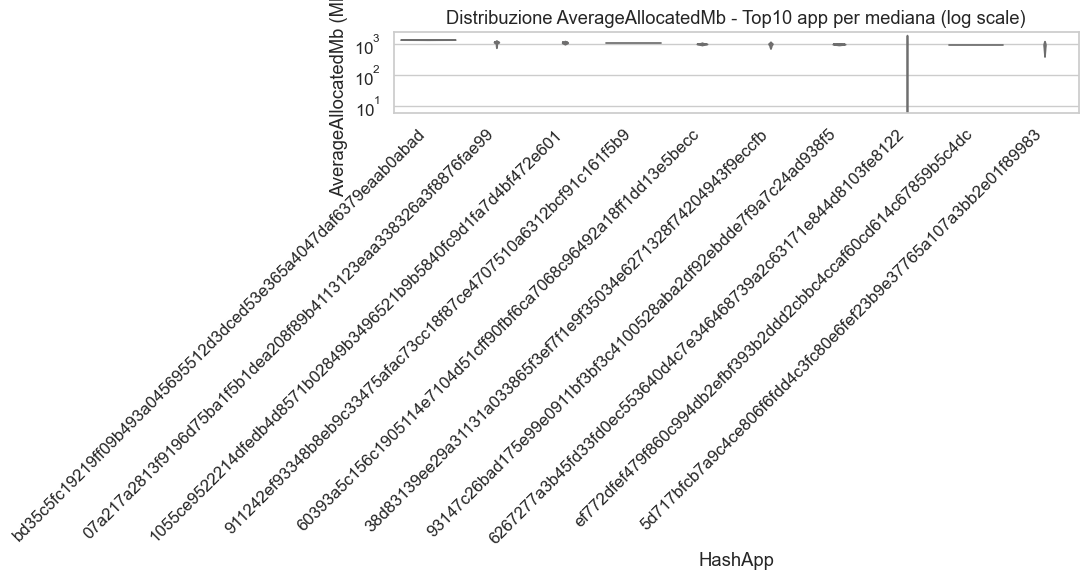

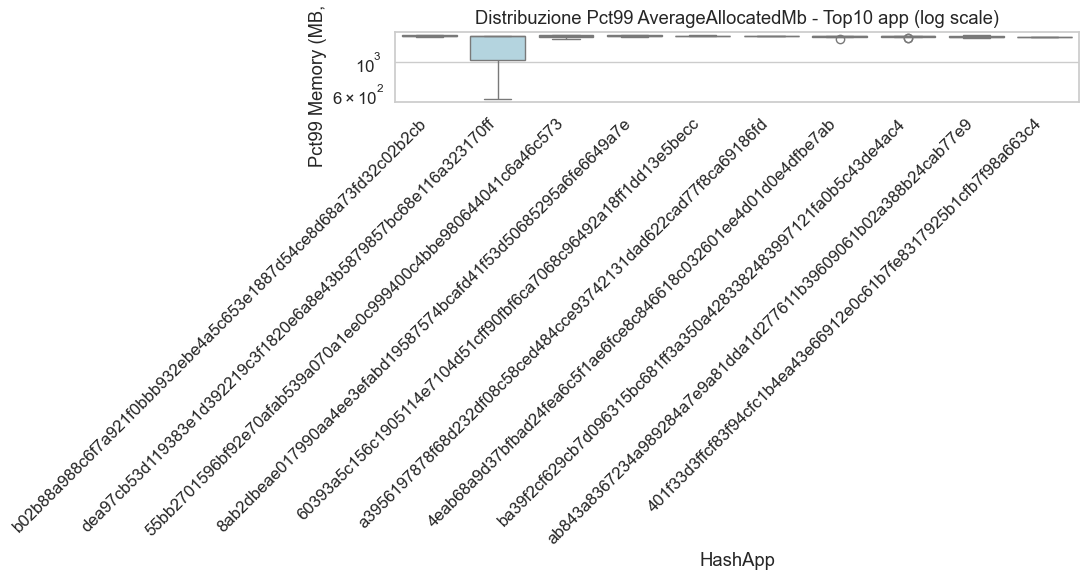

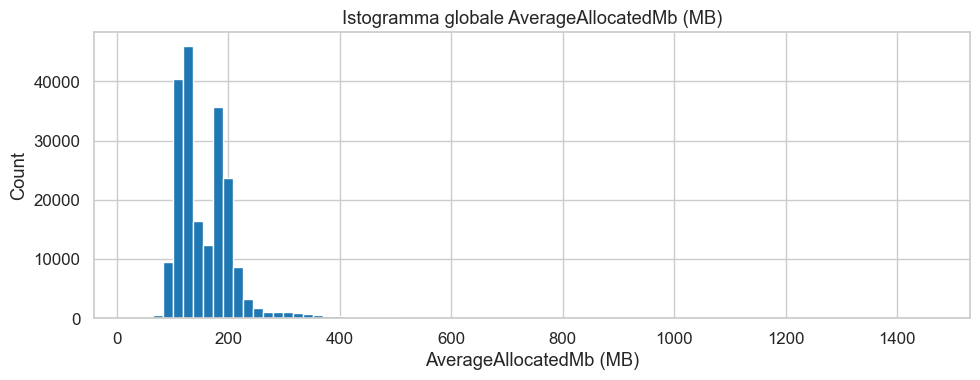

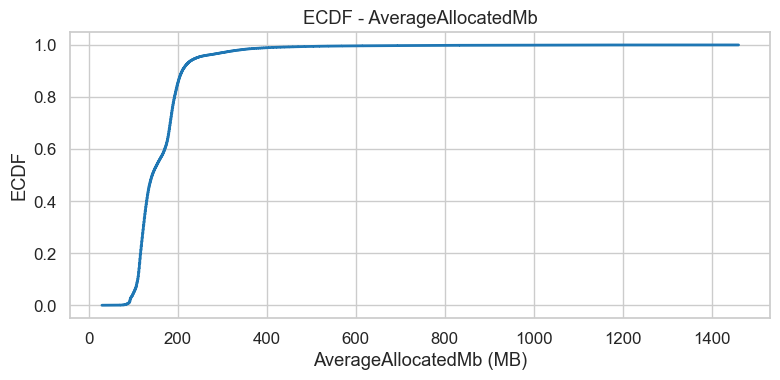


Anomalie rilevate: 165 (salvate in output/memory_anomalies.csv)
Analisi memoria completata. Figure e CSV salvati in 'figs/' e 'output/'


In [8]:
print("Analisi memoria allocata in streaming per RAM limitata...")

from collections import defaultdict

# -------------------------------
# Colonne da leggere
# -------------------------------
key_cols = ["HashOwner", "HashApp"]
mem_cols = [
    "SampleCount", "AverageAllocatedMb",
    "AverageAllocatedMb_pct5", "AverageAllocatedMb_pct25",
    "AverageAllocatedMb_pct50", "AverageAllocatedMb_pct75",
    "AverageAllocatedMb_pct95", "AverageAllocatedMb_pct99",
    "AverageAllocatedMb_pct100"
]
all_cols = key_cols + mem_cols

# -------------------------------
# Strutture per accumulo
# -------------------------------
app_memory = defaultdict(list)
app_pct95 = defaultdict(list)
app_pct99 = defaultdict(list)
app_samplec = defaultdict(list)
global_memory = []

# -------------------------------
# Streaming dei batch
# -------------------------------
for batch in ds_memory.to_batches(columns=all_cols):
    df = batch.to_pandas()
    if "AverageAllocatedMb" not in df.columns:
        continue
    df = df[df["AverageAllocatedMb"].notna() & (df["AverageAllocatedMb"] >= 0)]

    global_memory.extend(df["AverageAllocatedMb"].tolist())

    for app, grp in df.groupby("HashApp"):
        vals = grp["AverageAllocatedMb"].dropna().tolist()
        if vals: app_memory[app].extend(vals)
        if "AverageAllocatedMb_pct95" in grp.columns: app_pct95[app].extend(grp["AverageAllocatedMb_pct95"].dropna().tolist())
        if "AverageAllocatedMb_pct99" in grp.columns: app_pct99[app].extend(grp["AverageAllocatedMb_pct99"].dropna().tolist())
        if "SampleCount" in grp.columns: app_samplec[app].extend(grp["SampleCount"].dropna().tolist())

# -------------------------------
# Statistiche globali memoria
# -------------------------------
global_series = pd.Series(global_memory)
mem_stats = {
    "Median": global_series.median(),
    "P90": global_series.quantile(0.90),
    "P95": global_series.quantile(0.95),
    "P99": global_series.quantile(0.99),
    "Mean": global_series.mean(),
    "Min": global_series.min(),
    "Max": global_series.max(),
}
print("Statistiche globali della memoria allocata (MB):")
for k, v in mem_stats.items():
    print(f"- {k}: {v:.2f}")

# Salva percentili globali
percentiles = [25, 50, 75, 90, 95, 99]
percentile_values = global_series.quantile([p/100 for p in percentiles])
pd.DataFrame({
    "Percentile": [f"P{p}" for p in percentiles],
    "Value_Mb": percentile_values.values
}).to_csv(os.path.join(OUTPUT_DIR, "memory_global_percentiles.csv"),
         index=False, sep=';', encoding='utf-8')

# Grafico percentili globali
plt.figure(figsize=(8,4))
sns.barplot(x=[f"P{p}" for p in percentiles], y=percentile_values.values, color="tab:orange")
plt.yscale("log")
plt.title("Percentili globali - AverageAllocatedMb (MB) [log scale]")
plt.ylabel("Memory (MB, scala log)")
plt.xlabel("Percentile")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "memory_global_percentiles_log.png"))
plt.show()

# -------------------------------
# Top 10 app per mediana e pct99
# -------------------------------
app_median_mem = {a: pd.Series(v).median() for a,v in app_memory.items() if len(v)>0}
top10_apps_by_median = pd.Series(app_median_mem).sort_values(ascending=False).head(10)

app_pct99_median = {a: (pd.Series(v).median() if len(v)>0 else np.nan) for a,v in app_pct99.items()}
top10_apps_by_pct99 = pd.Series(app_pct99_median).sort_values(ascending=False).head(10)

pd.DataFrame({"App": top10_apps_by_median.index, "MedianMemory_MB": top10_apps_by_median.values})\
  .to_csv(os.path.join(OUTPUT_DIR, "top10_apps_by_median_memory.csv"), index=False, sep=';', encoding='utf-8')
pd.DataFrame({"App": top10_apps_by_pct99.index, "Pct99Memory_MB": top10_apps_by_pct99.values})\
  .to_csv(os.path.join(OUTPUT_DIR, "top10_apps_by_pct99_memory.csv"), index=False, sep=';', encoding='utf-8')

print("\nTop 10 app per mediana memoria (MB):")
print(top10_apps_by_median.to_string())
print("\nTop 10 app per Pct99 memoria (MB):")
print(top10_apps_by_pct99.to_string())

# -------------------------------
# Violin / Box plot Top10
# -------------------------------
def build_repeated_df(series_index, source_dict, col_name):
    rows = []
    for k in series_index:
        vals = source_dict.get(k, [])
        rows.extend([(k, x) for x in vals])
    return pd.DataFrame(rows, columns=[col_name+"_App", col_name])

top10_median_df = build_repeated_df(top10_apps_by_median.index, app_memory, "Memory")
plt.figure(figsize=(11,6))
sns.violinplot(x="Memory_App", y="Memory", data=top10_median_df, inner="quartile", dodge=False, color="lightcoral")
plt.yscale("log")
plt.title("Distribuzione AverageAllocatedMb - Top10 app per mediana (log scale)")
plt.xlabel("HashApp")
plt.ylabel("AverageAllocatedMb (MB, log)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "top10_apps_median_memory_violin_log.png"))
plt.show()

top10_pct99_df = build_repeated_df(top10_apps_by_pct99.index, app_pct99, "Pct99")
plt.figure(figsize=(11,6))
sns.boxplot(x="Pct99_App", y="Pct99", data=top10_pct99_df, color="lightblue", dodge=False)
plt.yscale("log")
plt.title("Distribuzione Pct99 AverageAllocatedMb - Top10 app (log scale)")
plt.xlabel("HashApp")
plt.ylabel("Pct99 Memory (MB, log)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "top10_apps_pct99_boxplot_log.png"))
plt.show()

# -------------------------------
# Distribuzione globale: istogramma + ECDF
# -------------------------------
plt.figure(figsize=(10,4))
plt.hist(global_series, bins=80)
plt.title("Istogramma globale AverageAllocatedMb (MB)")
plt.xlabel("AverageAllocatedMb (MB)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "memory_global_hist.png"))
plt.show()

sorted_vals = np.sort(global_series.dropna())
ecdf = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)
plt.figure(figsize=(8,4))
plt.plot(sorted_vals, ecdf)
plt.title("ECDF - AverageAllocatedMb")
plt.xlabel("AverageAllocatedMb (MB)")
plt.ylabel("ECDF")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "memory_global_ecdf.png"))
plt.show()

# -------------------------------
# Anomalie e outliers
# -------------------------------
anomalies = []
for app in set(list(app_memory.keys()) + list(app_pct95.keys()) + list(app_pct99.keys())):
    median_mem = pd.Series(app_memory[app]).median() if len(app_memory.get(app, []))>0 else np.nan
    pct95_med = pd.Series(app_pct95[app]).median() if len(app_pct95.get(app, []))>0 else np.nan
    pct99_med = pd.Series(app_pct99[app]).median() if len(app_pct99.get(app, []))>0 else np.nan
    samplecount_mean = pd.Series(app_samplec[app]).mean() if len(app_samplec.get(app, []))>0 else np.nan

    spike_flag = pct99_med > 2*pct95_med if not np.isnan(pct99_med) and not np.isnan(pct95_med) else False
    low_samples_flag = samplecount_mean < 10 if not np.isnan(samplecount_mean) else False
    always_high_flag = median_mem > 500 if not np.isnan(median_mem) else False

    if spike_flag or low_samples_flag or always_high_flag:
        anomalies.append({
            "App": app,
            "MedianMemory_MB": median_mem,
            "Pct95_Median_MB": pct95_med,
            "Pct99_Median_MB": pct99_med,
            "MeanSampleCount": samplecount_mean,
            "SpikeFlag": spike_flag,
            "LowSamplesFlag": low_samples_flag,
            "AlwaysHighFlag": always_high_flag
        })

anomalies_df = pd.DataFrame(anomalies).sort_values(
    ["SpikeFlag","AlwaysHighFlag","MedianMemory_MB"],
    ascending=[False, False, False]
)
anomalies_df.to_csv(os.path.join(OUTPUT_DIR, "memory_anomalies.csv"), index=False, sep=';', encoding='utf-8')
print(f"\nAnomalie rilevate: {len(anomalies_df)} (salvate in output/memory_anomalies.csv)")

print("Analisi memoria completata. Figure e CSV salvati in 'figs/' e 'output/'")


## 7) Analisi incrociata Invocations–Durations–Memory


Analisi Incrociata (invocations ⨝ durations ⨝ memory)

Caricamento chiavi invocations...
   → funzioni in invocations: 72,359

Caricamento chiavi durations...
   → funzioni in durations: 82,375

Caricamento chiavi memoria...
   → app in memory: 23,961

📌 Coverage tra dataset (uniche funzioni/app accoppiabili)
 - Invocations ∩ Durations: 71,597
 - Invocations ∩ Durations ∩ Memory: 69,729
   → campione creato: 45,008 righe

STATISTICHE INCROCIATE
        Invocations  AvgDuration_ms  CountDurSamples     AvgMem_MB
count  4.500800e+04    45008.000000     4.500800e+04  45008.000000
mean   2.006673e+04    10753.671969     2.085559e+04    169.870556
std    8.204179e+05    42742.145478     1.140679e+06     73.898480
min    1.000000e+00        0.000000     1.000000e+00     48.000000
50%    3.100000e+01      745.000000     2.400000e+01    158.000000
90%    1.561300e+03    19023.100000     1.440000e+03    224.000000
99%    1.343079e+05   244210.370000     1.176917e+05    460.000000
max    1.27471

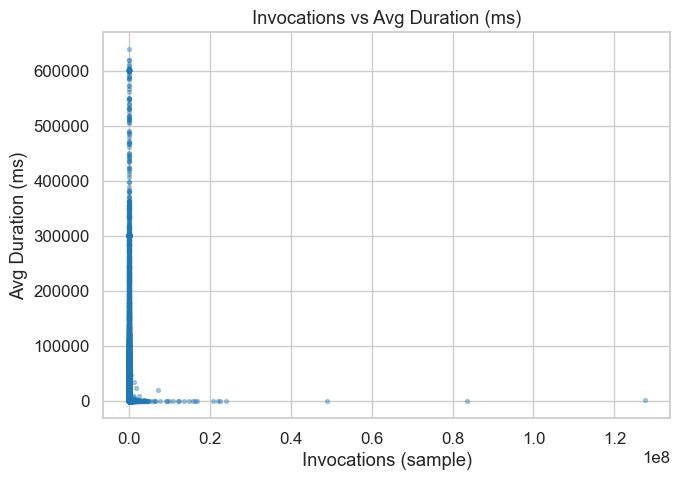

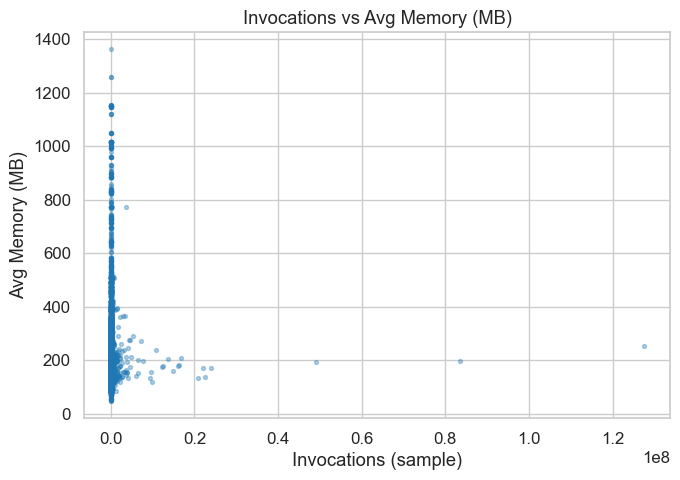

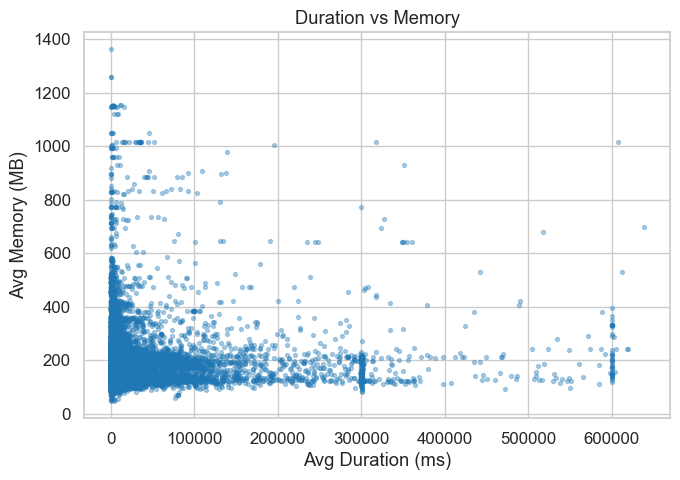

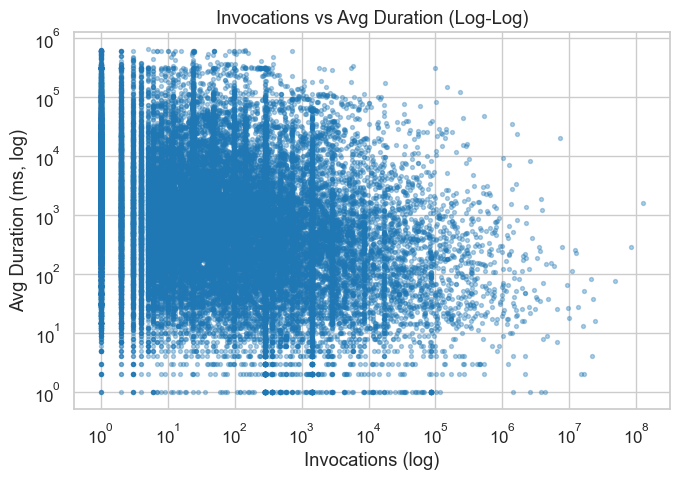

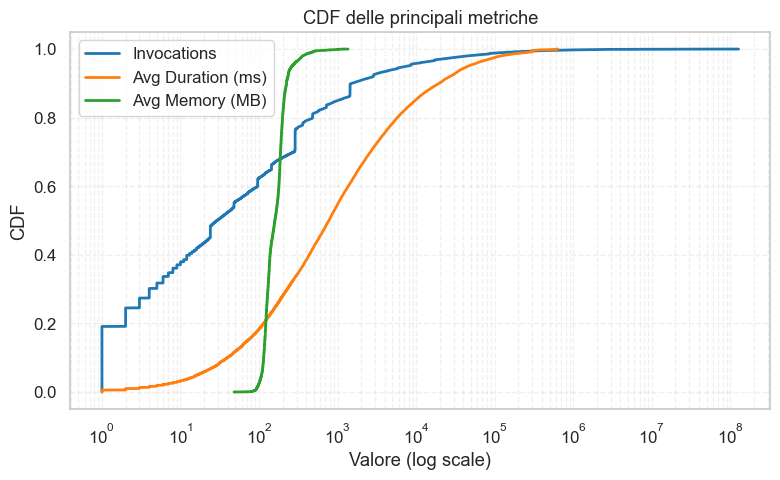

Analisiincrociata completata. Figure e CSV salvati in 'figs/' e 'output/'


In [9]:
print("\nAnalisi Incrociata (invocations ⨝ durations ⨝ memory)")

# ------------------------------------------------------------
# 1) Lettura streaming delle chiavi uniche dai dataset
# ------------------------------------------------------------
inv_keys = set()    
dur_keys = set()
mem_keys = set()

print("\nCaricamento chiavi invocations...")
for batch in ds_invocations.to_batches(columns=["HashOwner","HashApp","HashFunction"]):
    df = batch.to_pandas()
    inv_keys.update(zip(df.HashOwner, df.HashApp, df.HashFunction))
print(f"   → funzioni in invocations: {len(inv_keys):,}")

print("\nCaricamento chiavi durations...")
for batch in ds_durations.to_batches(columns=["HashOwner","HashApp","HashFunction"]):
    df = batch.to_pandas()
    dur_keys.update(zip(df.HashOwner, df.HashApp, df.HashFunction))
print(f"   → funzioni in durations: {len(dur_keys):,}")

print("\nCaricamento chiavi memoria...")
for batch in ds_memory.to_batches(columns=["HashOwner","HashApp"]):
    df = batch.to_pandas()
    mem_keys.update(zip(df.HashOwner, df.HashApp))
print(f"   → app in memory: {len(mem_keys):,}")

# ------------------------------------------------------------
# 2) Coverage e intersezioni
# ------------------------------------------------------------
common_inv_dur = inv_keys & dur_keys
common_all = {(o,a,f) for (o,a,f) in common_inv_dur if (o,a) in mem_keys}

print("\n📌 Coverage tra dataset (uniche funzioni/app accoppiabili)")
print(f" - Invocations ∩ Durations: {len(common_inv_dur):,}")
print(f" - Invocations ∩ Durations ∩ Memory: {len(common_all):,}")

# ------------------------------------------------------------
# 3) Costruzione campione incrociato scalabile
# ------------------------------------------------------------
target_size = 30_000
sample = []

# Dizionari di lookup minimi
dur_dict = {}
for batch in ds_durations.to_batches(columns=["HashOwner","HashApp","HashFunction","Average","Count"]):
    df = batch.to_pandas()
    for r in df.itertuples(index=False):
        dur_dict[(r.HashOwner, r.HashApp, r.HashFunction)] = (r.Average, r.Count)
    if len(dur_dict) > 100_000:
        break

mem_dict = {}
for batch in ds_memory.to_batches(columns=["HashOwner","HashApp","AverageAllocatedMb"]):
    df = batch.to_pandas()
    for r in df.itertuples(index=False):
        mem_dict[(r.HashOwner, r.HashApp)] = r.AverageAllocatedMb
    if len(mem_dict) > 50_000:
        break

# Sampling invocations
for batch in ds_invocations.to_batches():
    df = batch.to_pandas()
    minute_cols = [c for c in df.columns if c.isdigit()]
    df["TotalInvocations"] = df[minute_cols].sum(axis=1)

    for r in df.itertuples(index=False):
        key = (r.HashOwner, r.HashApp, r.HashFunction)
        if key not in dur_dict: continue
        if (r.HashOwner, r.HashApp) not in mem_dict: continue
        sample.append((
            r.TotalInvocations,
            dur_dict[key][0],
            dur_dict[key][1],
            mem_dict[(r.HashOwner, r.HashApp)]
        ))
    if len(sample) >= target_size:
        break

sample_df = pd.DataFrame(sample, columns=[
    "Invocations",
    "AvgDuration_ms",
    "CountDurSamples",
    "AvgMem_MB"
])
print(f"   → campione creato: {len(sample_df):,} righe")

# ------------------------------------------------------------=
# 4) Statistiche incrociate
# ------------------------------------------------------------
print("\nSTATISTICHE INCROCIATE")
print(sample_df.describe(percentiles=[0.5,0.9,0.99]))

# ------------------------------------------------------------
# 5) Scatter plots robusti + log-log aggiuntivi
# ------------------------------------------------------------

# Scatter lineari
plt.figure(figsize=(7,5))
plt.scatter(sample_df["Invocations"], sample_df["AvgDuration_ms"], s=8, alpha=0.35)
plt.title("Invocations vs Avg Duration (ms)")
plt.xlabel("Invocations (sample)")
plt.ylabel("Avg Duration (ms)")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "inv_vs_duration.png"))
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(sample_df["Invocations"], sample_df["AvgMem_MB"], s=8, alpha=0.35)
plt.title("Invocations vs Avg Memory (MB)")
plt.xlabel("Invocations (sample)")
plt.ylabel("Avg Memory (MB)")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "inv_vs_memory.png"))
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(sample_df["AvgDuration_ms"], sample_df["AvgMem_MB"], s=8, alpha=0.35)
plt.title("Duration vs Memory")
plt.xlabel("Avg Duration (ms)")
plt.ylabel("Avg Memory (MB)")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "duration_vs_memory.png"))
plt.show()

# Scatter log-log
sample_df_filtered = sample_df[(sample_df > 0).all(axis=1)]
plt.figure(figsize=(7,5))
plt.scatter(sample_df_filtered["Invocations"], sample_df_filtered["AvgDuration_ms"], s=8, alpha=0.35)
plt.xscale("log")
plt.yscale("log")
plt.title("Invocations vs Avg Duration (Log-Log)")
plt.xlabel("Invocations (log)")
plt.ylabel("Avg Duration (ms, log)")
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "inv_vs_duration_loglog.png"))
plt.show()

# ------------------------------------------------------------
# 6) CDF metriche principali
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
for col, label in [("Invocations", "Invocations"),
                   ("AvgDuration_ms", "Avg Duration (ms)"),
                   ("AvgMem_MB", "Avg Memory (MB)")]:
    vals = sample_df_filtered[col].sort_values()
    y = np.linspace(0, 1, len(vals))
    plt.plot(vals, y, label=label)
plt.xscale("log")
plt.xlabel("Valore (log scale)")
plt.ylabel("CDF")
plt.title("CDF delle principali metriche")
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(FIGS_DIR, "cdf_metrics.png"))
plt.show()

print("Analisiincrociata completata. Figure e CSV salvati in 'figs/' e 'output/'")

## 8) Recap finale

In [10]:
print("RECAP DEI PRINCIPALI RISULTATI")

recap_dict = {
    "Owner totali": n_owners,
    "App totali": n_apps,
    "Funzioni totali": n_funcs,
    "Funzioni con durations": n_fun_dur,
    "Funzioni senza durations": n_fun_no_dur,
    "App con memory": n_app_mem,
    "App senza memory": n_app_no_mem,
    "Minuto di picco invocazioni": f"{peak_minute//60}:{peak_minute%60}",
    "Minuto minimo invocazioni": f"{min_minute//60}:{min_minute%60}",
    "Top 3 funzioni più invocate": top10_funcs['Function'].head(3).tolist(),
    "Top 3 app più invocate": top10_apps['App'].head(3).tolist(),
    "Top 3 funzioni più lente (mediana ms)": top_slowest_funcs.head(3).to_dict(),
    "Top 3 app più lente (mediana ms)": top_slowest_apps.head(3).to_dict(),
    "Top 10 app per memoria mediana (MB)": top10_apps_by_median.to_dict(),
    "Anomalie memoria rilevate": len(anomalies_df)
}

for k, v in recap_dict.items():
    print(f"- {k}: {v}")

# Salvataggio CSV recap
pd.DataFrame(list(recap_dict.items()), columns=["Metric", "Value"])\
  .to_csv(os.path.join(OUTPUT_DIR, "recap_summary.csv"), index=False, sep=';', encoding='utf-8')

print("Recap salvato in output/recap_summary.csv")


RECAP DEI PRINCIPALI RISULTATI
- Owner totali: 14681
- App totali: 24274
- Funzioni totali: 72359
- Funzioni con durations: 71597
- Funzioni senza durations: 762
- App con memory: 23431
- App senza memory: 843
- Minuto di picco invocazioni: 14:8
- Minuto minimo invocazioni: 4:27
- Top 3 funzioni più invocate: ['8203ff88388384a6f9ed28664e8e9484119ff340cb7dc0811a15194b3a507f0e', '5315be05fc3b21a3f483ed0759bce825764dcf8a762623a1d94ff63f9d9ce4cc', 'dd833bb70b3a57caaa6b4e4560975d9ba5a77fd0151e13d1b5f30b4f6c381d5c']
- Top 3 app più invocate: ['94409f2485ebd997a61cbd06906595e4f3ef1846ed7406f9e3fa03cfa4d5060a', '734bb9a04a1d2e6917f75e46c093a6c95d114970e624b9975b98bad86c12f14b', '4b75f2532af503341fd11268d543ad0119dd2e8950a022f2851b4a5d0c8a5e0a']
- Top 3 funzioni più lente (mediana ms): {'0ab944f5c72a4b9f807931d23f704cfaf8296477f3c4a64fe77807280fcd5c6c': 886277.0, '1e5bfcc662ff982b62ca347d1058f43780275234da00b4b5162e6a887d82a56a': 650456.0, 'd3209b753752c8641cde05ba81b3ceb0d175b1f986fee7872a9368